In [33]:
import os

if not os.getcwd().endswith('Dissertation'):
    os.chdir('..')

In [34]:
import pandas as pd
import numpy as np

csv_location = 'Data\\Updated_CSV_data_Filtered\\2020.csv'
data = pd.read_csv(csv_location)
data = data[data['Circuit'] == 'Silverstone']


In [35]:
laps_set = 80

laps = np.arange(laps_set)
data_to_use = pd.concat([data[:1] for i in range(laps_set)])
data_to_use['LapsCompleted'] = laps + 1
data_to_use['SessionName'] = 'Q2'

In [36]:
import random

from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

from ModelUsage import convert_to_training_data
from ModelUsage import random_search

def get_kernel():


    random_search_indices = random.sample([i for i in range(len(data))], 10)

    dataframe, X_kernel = data.drop(index=random_search_indices), data.loc[random_search_indices]



    X_train_kernel, y_train_kernel = convert_to_training_data(X_kernel)
    X_train, y_train = convert_to_training_data(dataframe)

    kernel = RBF() + RBF() + ConstantKernel()
    new_kernel, loss = random_search(GaussianProcessRegressor, kernel, (1e-10, 1e10),
                                     X_train, y_train, X_train_kernel, y_train_kernel,
                                     size=3, loops=10, return_loss=True,
                                     pbar=False)
    dataframe.to_csv('Temp.csv', index=False)

    return new_kernel, loss

In [37]:
from ModelUsage import get_trained_model, convert_to_input

def make_prediction():
    kernel, _ = get_kernel()
    model, constants = get_trained_model(kernel, 'Temp.csv', return_constants=True)

    os.remove('Temp.csv')
    prediction = model.predict(convert_to_input(data_to_use, constants))
    return prediction

In [38]:
from tqdm.autonotebook import tqdm
import numpy as np

np.random.seed(0)

predictions = []
for i in tqdm(range(10)):
    predictions.append(make_prediction())

  0%|          | 0/10 [00:00<?, ?it/s]

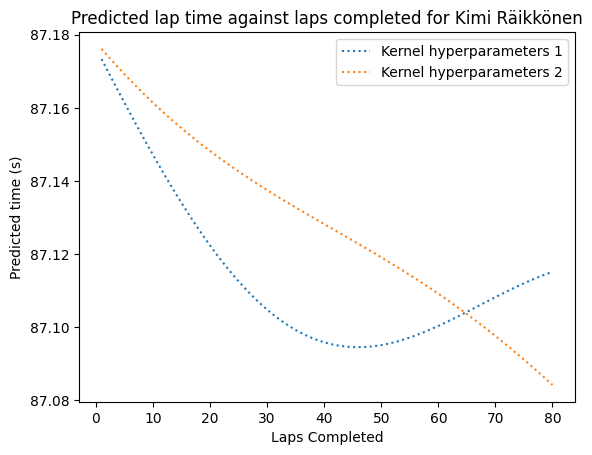

In [42]:
import matplotlib.pyplot as plt

for count, prediction in enumerate(predictions[1:3], start=1):
    plt.plot(laps + 1, data.iloc[0]['ExpectedTime'] + prediction, linestyle='dotted', label=f'Kernel hyperparameters {count}')
plt.xlabel('Laps Completed')
plt.ylabel('Predicted time (s)')
plt.legend()
_ = plt.title("Predicted lap time against laps completed for Kimi Räikkönen")

plt.savefig('Data\\plots\\kernel_decrease_as_laps_increase.png')
plt.show()

In [40]:
print(data[data['SessionName'] == 'Q2'])

           DriverName          Team  LapTime               TOD   TyreID  \
49    Alexander Albon      Red Bull   86.580  14:29:38.0360000  23202.0   
50    Nico Hulkenberg  Racing Point   86.645  14:29:43.2010000  11203.0   
51     Max Verstappen      Red Bull   86.144  14:29:53.0250000  33202.0   
52    Valtteri Bottas  Mercedes AMG   85.015  14:30:04.7700000  77202.0   
53     George Russell      Williams   87.366  14:30:12.0950000  63305.0   
54       Lando Norris       McLaren   86.420  14:30:17.8260000   4306.0   
55       Lance Stroll  Racing Point   86.501  14:30:23.9240000  18202.0   
56   Carlos Sainz Jr.       McLaren   86.276  14:30:29.7690000  55306.0   
57    Charles Leclerc       Ferrari   86.203  14:30:37.9700000  16203.0   
58   Sebastian Vettel       Ferrari   86.455  14:30:43.7150000   5305.0   
59       Esteban Ocon       Renault   86.252  14:31:01.7250000  31306.0   
60     Lewis Hamilton  Mercedes AMG   85.347  14:41:03.8590000  44203.0   
61       Lance Stroll  Ra